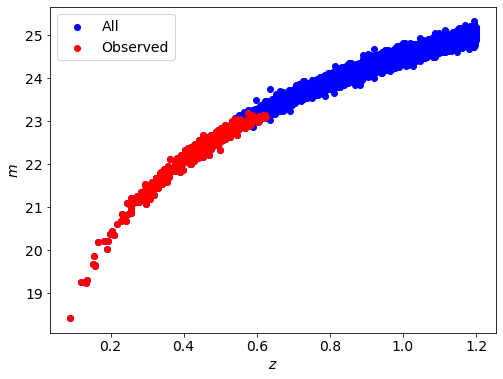

In [124]:
import numpy as np
from matplotlib import pyplot as plt
import numpyro
from numpyro.infer import MCMC, NUTS, Predictive
import numpyro.distributions as dist
from numpyro.diagnostics import hpdi
from jax import random
import jax

from jax.scipy.stats import norm
from jax.scipy.special import ndtri
#assert numpyro.__version__.startswith("0.11.0")

numpyro.set_host_device_count(4)
jax.config.update('jax_enable_x64',True)


import jax_cosmo as jc
from jax_cosmo import Cosmology, background

from astropy.cosmology import FlatLambdaCDM,LambdaCDM,wCDM
from astropy.coordinates import Distance

from numpyro import sample

import numpyro.distributions as dist

import jax.numpy as jnp



def sample_model(z_s,mag_s=None,sel_s=None,M0=-19.5,sigma_int=0.1,h=0.7324,Om0=0.28,w=-1,mu_cut=23,sigma_cut=0.1):

    cosmo_jax = Cosmology(Omega_c=Om0, h=h, w0=w, Omega_b=0, n_s= 0.96, sigma8=200000, Omega_k=0, wa=0)

    
    n_sne=len(z_s)
    
    with numpyro.plate("plate_i",n_sne):
        
        
        d_s=background.transverse_comoving_distance(cosmo_jax, 1/(1+z_s))
    
        mu_s=5*jnp.log10((1+z_s)/h*d_s*1e6/10)
        
        m_s=numpyro.sample("m_s", dist.Normal(M0+mu_s, sigma_int), obs=mag_s)
        
        p_s=norm.cdf(-m_s,loc=-mu_cut,scale=sigma_cut)
        
        sel_s=numpyro.sample("sel_s",dist.Bernoulli(p_s),obs=sel_s)
        
        
        
        
def model_flat(z_s,m_s=None,sel_s=None,h=0.7324,mu_cut=23,sigma_cut=0.1):

    
    M0=numpyro.sample('M0', dist.ImproperUniform(dist.constraints.real,(),event_shape=()))
    sigma_int = numpyro.sample("sigma_int", dist.HalfCauchy(1))
    Om0=numpyro.sample('Om0',dist.Uniform(0,1))
    w=numpyro.sample('w', dist.Uniform(-2,2))
    
    cosmo_jax = Cosmology(Omega_c=Om0, h=h, w0=w, Omega_b=0, n_s= 0.96, sigma8=200000, Omega_k=0, wa=0)

    
    n_sne=len(z_s)
    
    with numpyro.plate("plate_i",n_sne):
        
        
        d_s=background.transverse_comoving_distance(cosmo_jax, 1/(1+z_s))
    
        mu_s=5*jnp.log10((1+z_s)/h*d_s*1e6/10)
        
        m_s=numpyro.sample("m_s", dist.Normal(M0+mu_s, sigma_int), obs=m_s)
        
        

        p_s=norm.cdf(-m_s,loc=-mu_cut,scale=sigma_cut)
        
        sel_s=numpyro.sample("sel_s",dist.Bernoulli(p_s),obs=sel_s)
        
        

        
def naive_sample_model(z_s,mag_s=None,M0=-19.5,sigma_int=0.1,h=0.7324,Om0=0.28,w=-1):
    
    
    
    cosmo_jax = Cosmology(Omega_c=Om0, h=h, w0=w, Omega_b=0, n_s= 0.96, sigma8=200000, Omega_k=0, wa=0)
    

    n_sne=len(z_s)
    
    with numpyro.plate("plate_i",n_sne):
        
        
        d_s=background.transverse_comoving_distance(cosmo_jax, 1/(1+z_s))
    
        mu_s=5*jnp.log10((1+z_s)/h*d_s*1e6/10)
        
        m_s=numpyro.sample("m_s", dist.Normal(M0+mu_s, sigma_int), obs=mag_s)
        
        
        
def naive_model_flat(z_s,m_s=None,h=0.7324):

    
    M0=numpyro.sample('M0', dist.ImproperUniform(dist.constraints.real,(),event_shape=()))
    sigma_int = numpyro.sample("sigma_int", dist.HalfCauchy(1))
    Om0=numpyro.sample('Om0',dist.Uniform(0,1))
    w=numpyro.sample('w', dist.Uniform(-2,2))
    
    cosmo_jax = Cosmology(Omega_c=Om0, h=h, w0=w, Omega_b=0, n_s= 0.96, sigma8=200000, Omega_k=0, wa=0)

    
    n_sne=len(z_s)
    
    with numpyro.plate("plate_i",n_sne):
        
        
        d_s=background.transverse_comoving_distance(cosmo_jax, 1/(1+z_s))
    
        mu_s=5*jnp.log10((1+z_s)/h*d_s*1e6/10)
        
        m_s=numpyro.sample("m_s", dist.Normal(M0+mu_s, sigma_int), obs=m_s)
        



def step_sample_model(z_s,mag_s=None,sel_s=None,M0=-19.5,sigma_int=0.1,h=0.7324,Om0=0.28,w=-1,mu_cut=23):

    cosmo_jax = Cosmology(Omega_c=Om0, h=h, w0=w, Omega_b=0, n_s= 0.96, sigma8=2000, Omega_k=0, wa=0)

    
    n_sne=len(z_s)
    
    with numpyro.plate("plate_i",n_sne):
        
        
        d_s=background.transverse_comoving_distance(cosmo_jax, 1/(1+z_s))
    
        mu_s=5*jnp.log10((1+z_s)/h*d_s*1e6/10)
        
        m_s=numpyro.sample("m_s", dist.Normal(M0+mu_s, sigma_int), obs=mag_s)
        

        p_s=jnp.heaviside(mu_cut-m_s,0)
        
        sel_s=numpyro.sample("sel_s",dist.Bernoulli(p_s),obs=sel_s)
        
        
        
        
def step_flat(z_s,m_s=None,sel_s=None,h=0.7324,mu_cut=23):

    
    M0=numpyro.sample('M0', dist.ImproperUniform(dist.constraints.real,(),event_shape=()))
    sigma_int = numpyro.sample("sigma_int", dist.HalfCauchy(1))
    Om0=numpyro.sample('Om0',dist.Uniform(0,1))
    w=numpyro.sample('w', dist.Uniform(-2,2))
    
    
    cosmo_jax = Cosmology(Omega_c=Om0, h=h, w0=w, Omega_b=0, n_s= 0.96, sigma8=200000, Omega_k=0, wa=0)

    
    n_sne=len(z_s)
    
    with numpyro.plate("plate_i",n_sne):
        
        
        d_s=background.transverse_comoving_distance(cosmo_jax, 1/(1+z_s))
    
        mu_s=5*jnp.log10((1+z_s)/h*d_s*1e6/10)
        
        m_s=numpyro.sample("m_s", dist.Normal(M0+mu_s, sigma_int), obs=m_s)
        
        

        p_s=jnp.heaviside(mu_cut-m_s,0)
        
        
        sel_s=numpyro.sample("sel_s",dist.Bernoulli(p_s),obs=sel_s)
        
        


        
u=np.random.rand(4000)

z_s=jnp.asarray((3*u)**(1/3)/(3)**(1/3)*1.2)

seed=1701

rng_key = jax.random.PRNGKey(seed)
rng_key, rng_key_ = random.split(rng_key)
prior_predictive = Predictive(sample_model, num_samples=1)
prior_predictions = prior_predictive(rng_key_,z_s)

m_sim = prior_predictions["m_s"][0,:]
sel_sim = prior_predictions["sel_s"][0,:]

plt.figure(figsize=(8,6))
plt.scatter(z_s,m_sim,color='blue',label='All')
plt.scatter(z_s[sel_sim==1],m_sim[sel_sim==1],color='red',label='Observed')
plt.ylabel('$m$')
plt.xlabel('$z$')
plt.legend()
plt.show()

In [125]:
print(z_s.shape)
print(sel_sim[sel_sim==1].shape)

(4000,)
(441,)


In [126]:

nuts_kernel = NUTS(model_flat,adapt_step_size=True)
mcmc = MCMC(nuts_kernel, num_samples=2000, num_warmup=10000,num_chains=4)
rng_key = random.PRNGKey(0)
#mcmc.run(rng_key, z_s,m_s= m_sim)




mcmc.run(rng_key, z_s[sel_sim==1.],m_s= m_sim[sel_sim==1.],sel_s=sel_sim[sel_sim==1.])





  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
         M0    -19.52      0.04    -19.53    -19.59    -19.46    315.21      1.01
        Om0      0.45      0.03      0.45      0.39      0.50    721.43      1.01
  sigma_int      0.10      0.00      0.10      0.10      0.11   1732.03      1.00
          w     -1.66      0.25     -1.71     -2.00     -1.29    223.15      1.02

Number of divergences: 184


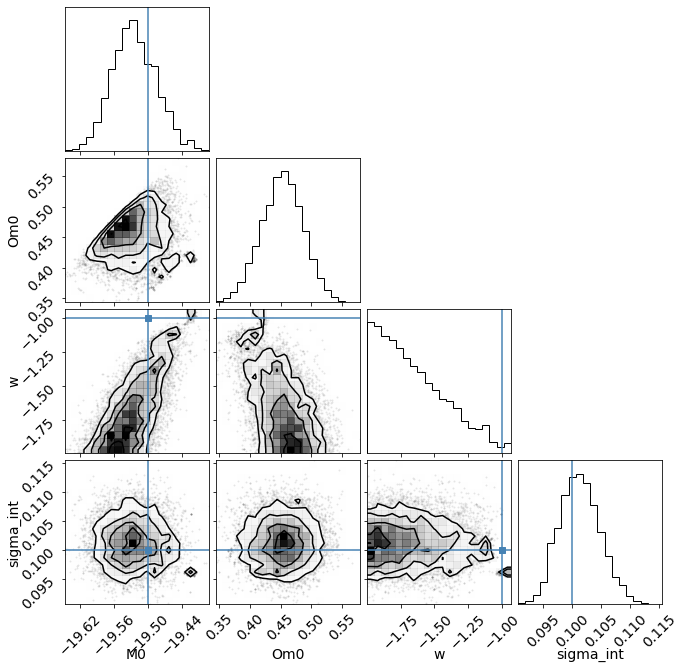

In [127]:
import corner
mcmc.print_summary()
posterior_samples = mcmc.get_samples()
a=['M0', 'Om0', 'w','sigma_int']


samps=np.zeros((len(a),8000))

for i in range(len(a)):
    samps[i,:]=posterior_samples[a[i]]


corner.corner(samps.T,labels=a,truths=[-19.5,0.28,-1,0.1])
plt.show()

In [128]:

nuts_kernel = NUTS(naive_model_flat,adapt_step_size=True)
mcmc2 = MCMC(nuts_kernel, num_samples=2000, num_warmup=10000,num_chains=4)
rng_key = random.PRNGKey(0)
#mcmc.run(rng_key, z_s,m_s= m_sim)
mcmc2.run(rng_key, z_s[sel_sim==1.],m_s= m_sim[sel_sim==1.])


  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

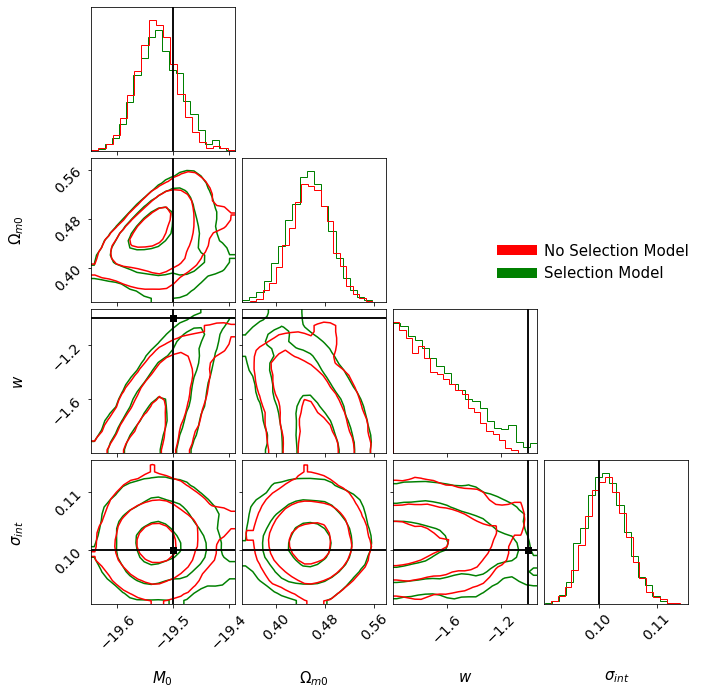

In [129]:
import corner
import matplotlib.lines as mlines
import matplotlib 

matplotlib.rcParams.update({'font.size': 14})


a=['M0','Om0','w','sigma_int']

posterior_samples = mcmc.get_samples()


samps=np.zeros((len(a),8000))

for i in range(len(a)):
    samps[i,:]=posterior_samples[a[i]]


truths_arr=[-19.5,0.28,-1,0.1]



fig=corner.corner(samps.T,truths=truths_arr,smooth=0.9,
    label_kwargs=dict(fontsize=35),
    title_kwargs=dict(fontsize=16),
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=False,
    max_n_ticks=3,truth_color='black',color='green',labelpad=0.15,title_fmt='.3f')


posterior_samples2 = mcmc2.get_samples()


samps2=np.zeros((len(a),8000))

for i in range(len(a)):
    samps2[i,:]=posterior_samples2[a[i]]



corner.corner(samps2.T,labels=[r'$M_0$',r'$\Omega_{m0}$',r'$w$',r'$\sigma_{int}$'],truths=truths_arr,smooth=0.9,
    label_kwargs=dict(fontsize=15),
    title_kwargs=dict(fontsize=15),
  
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=False,
    max_n_ticks=3,color='red',truth_color='black',labelpad=0.15,title_fmt='.3f',fig=fig)
    
red_line = mlines.Line2D([], [], color='red', label=r'No Selection Model',linewidth=10)
green_line = mlines.Line2D([], [], color='green', label=r'Selection Model',linewidth=10)
plt.legend(handles=[red_line,green_line],fontsize=15, frameon=False,bbox_to_anchor=(1, 2.5, 0.1, 0.1),loc='upper right')
plt.savefig('panth_corner.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

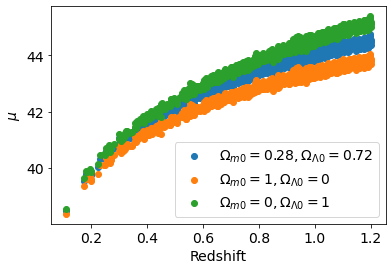

In [80]:
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import Distance

sne=1000

u=np.random.rand(sne)

red=(3*u)**(1/3)/(3)**(1/3)*1.2

noise=np.random.normal(0,0.1,sne)


cosmo = FlatLambdaCDM(H0=73.24, Om0=0.28)




d=np.array(Distance(z=red, cosmology=cosmo))     

mu=5*np.log10(d*1e6/10)+noise



plt.scatter(red,mu,label='$\Omega_{m0}=0.28,\Omega_{\Lambda 0}=0.72$')



cosmo = FlatLambdaCDM(H0=73.24, Om0=1)
d=np.array(Distance(z=red, cosmology=cosmo)) 
mu=5*np.log10(d*1e6/10)+noise     
plt.scatter(red,mu,label='$\Omega_{m0}=1,\Omega_{\Lambda 0}=0$')


cosmo = FlatLambdaCDM(H0=73.24, Om0=0)

d=np.array(Distance(z=red, cosmology=cosmo)) 
mu=5*np.log10(d*1e6/10)+noise     
       
plt.scatter(red,mu,label='$\Omega_{m0}=0,\Omega_{\Lambda 0}=1$')
plt.xlabel('Redshift')
plt.ylabel('$\mu$')
plt.legend()
plt.show()

(array([  7.,  20.,  31.,  45.,  76.,  88., 128., 164., 169., 272.]),
 array([0.11012599, 0.21910606, 0.32808612, 0.43706619, 0.54604626,
        0.65502632, 0.76400639, 0.87298646, 0.98196652, 1.09094659,
        1.19992666]),
 <BarContainer object of 10 artists>)

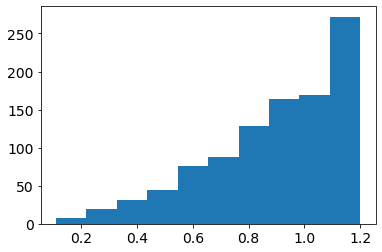

In [81]:
plt.hist(red)

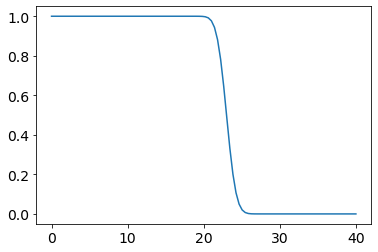

In [71]:
from scipy.stats import norm

x=np.linspace(-0,40,100)
norm.ppf(0.025)





plt.plot(x,norm.cdf(-x,loc=-23,scale=1))



plt.show()

[23.03607834 24.05912337 23.99133994 ... 25.02540943 24.235632
 24.84442254]


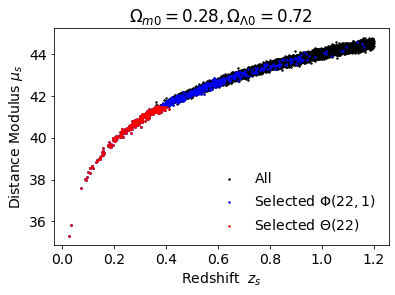

In [72]:
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import Distance

sne=10000

u=np.random.rand(sne)

red=(3*u)**(1/3)/(3)**(1/3)*1.2

noise=np.random.normal(0,0.1,sne)


cosmo = FlatLambdaCDM(H0=73.24, Om0=0.28)

plt.title(r'$\Omega_{m0}=0.28,\Omega_{\Lambda 0}=0.72$')


d=np.array(Distance(z=red, cosmology=cosmo))     

mu=5*np.log10(d*1e6/10)+noise


m=-19.5+mu


prob_sel=norm.cdf(-m,loc=-22,scale=1)
print(m)

draw=np.random.rand(sne)

sel=np.zeros(sne)

sel[draw<prob_sel]=1

sel2=m<22


plt.scatter(red,mu,label='All',color='black',s=2)

plt.scatter(red[sel==1],mu[sel==1],label=r'Selected $\Phi(22,1)$',color='blue',s=2)
plt.scatter(red[sel2==1],mu[sel2==1],label=r'Selected $\Theta(22)$',color='red',s=2)


plt.xlabel(r'Redshift  $z_s$')
plt.ylabel('Distance Modulus $\mu_s$')
plt.legend(frameon=False)
plt.savefig('toyselec.pdf')
plt.show()

In [ ]:
bins=np.linspace(0,1.2,50)
#plt.hist(red,bins=bins)
plt.hist(red[sel==1],bins=bins)
plt.show()